In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
import warnings
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from tqdm import tqdm


warnings.filterwarnings('ignore')

In [2]:
sample_submission = pd.read_csv("data/sample_submission.csv")
print(f"SampleSubmission:")
display(sample_submission.info())
display(sample_submission.sample(5))
print("\nNaN:")
display(sample_submission.isna().sum())

SampleSubmission:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


None

,PassengerId,Transported
928,1921_01,False
1502,3242_01,False
3127,6849_01,False
1674,3601_03,False
571,1183_03,False



NaN:


PassengerId    0
Transported    0
dtype: int64

In [3]:
train = pd.read_csv("data/train.csv")
print(f"\nTrain:")
display(train.info())


Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

In [4]:
test = pd.read_csv("data/test.csv")
print(f"\nTest:")
display(test.info())


Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


None

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7339,7853_01,NaN,False,F/1502/S,TRAPPIST-1e,42.0,False,1227.0,773.0,14.0,0.0,0.0,Gran Chpie,0.0
352,0385_01,Earth,False,G/65/P,TRAPPIST-1e,23.0,False,13.0,747.0,0.0,0.0,128.0,Tanley Klinson,0.0
5217,5563_01,Europa,True,C/176/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Maham Cattyried,1.0
9282,1209_02,Europa,False,C/47/P,TRAPPIST-1e,54.0,NaN,48.0,2650.0,0.0,424.0,1031.0,Mimosam Aloquinght,NaN
10040,2896_01,Earth,False,F/550/S,TRAPPIST-1e,23.0,False,11.0,0.0,0.0,0.0,1281.0,Clard Sweenez,NaN


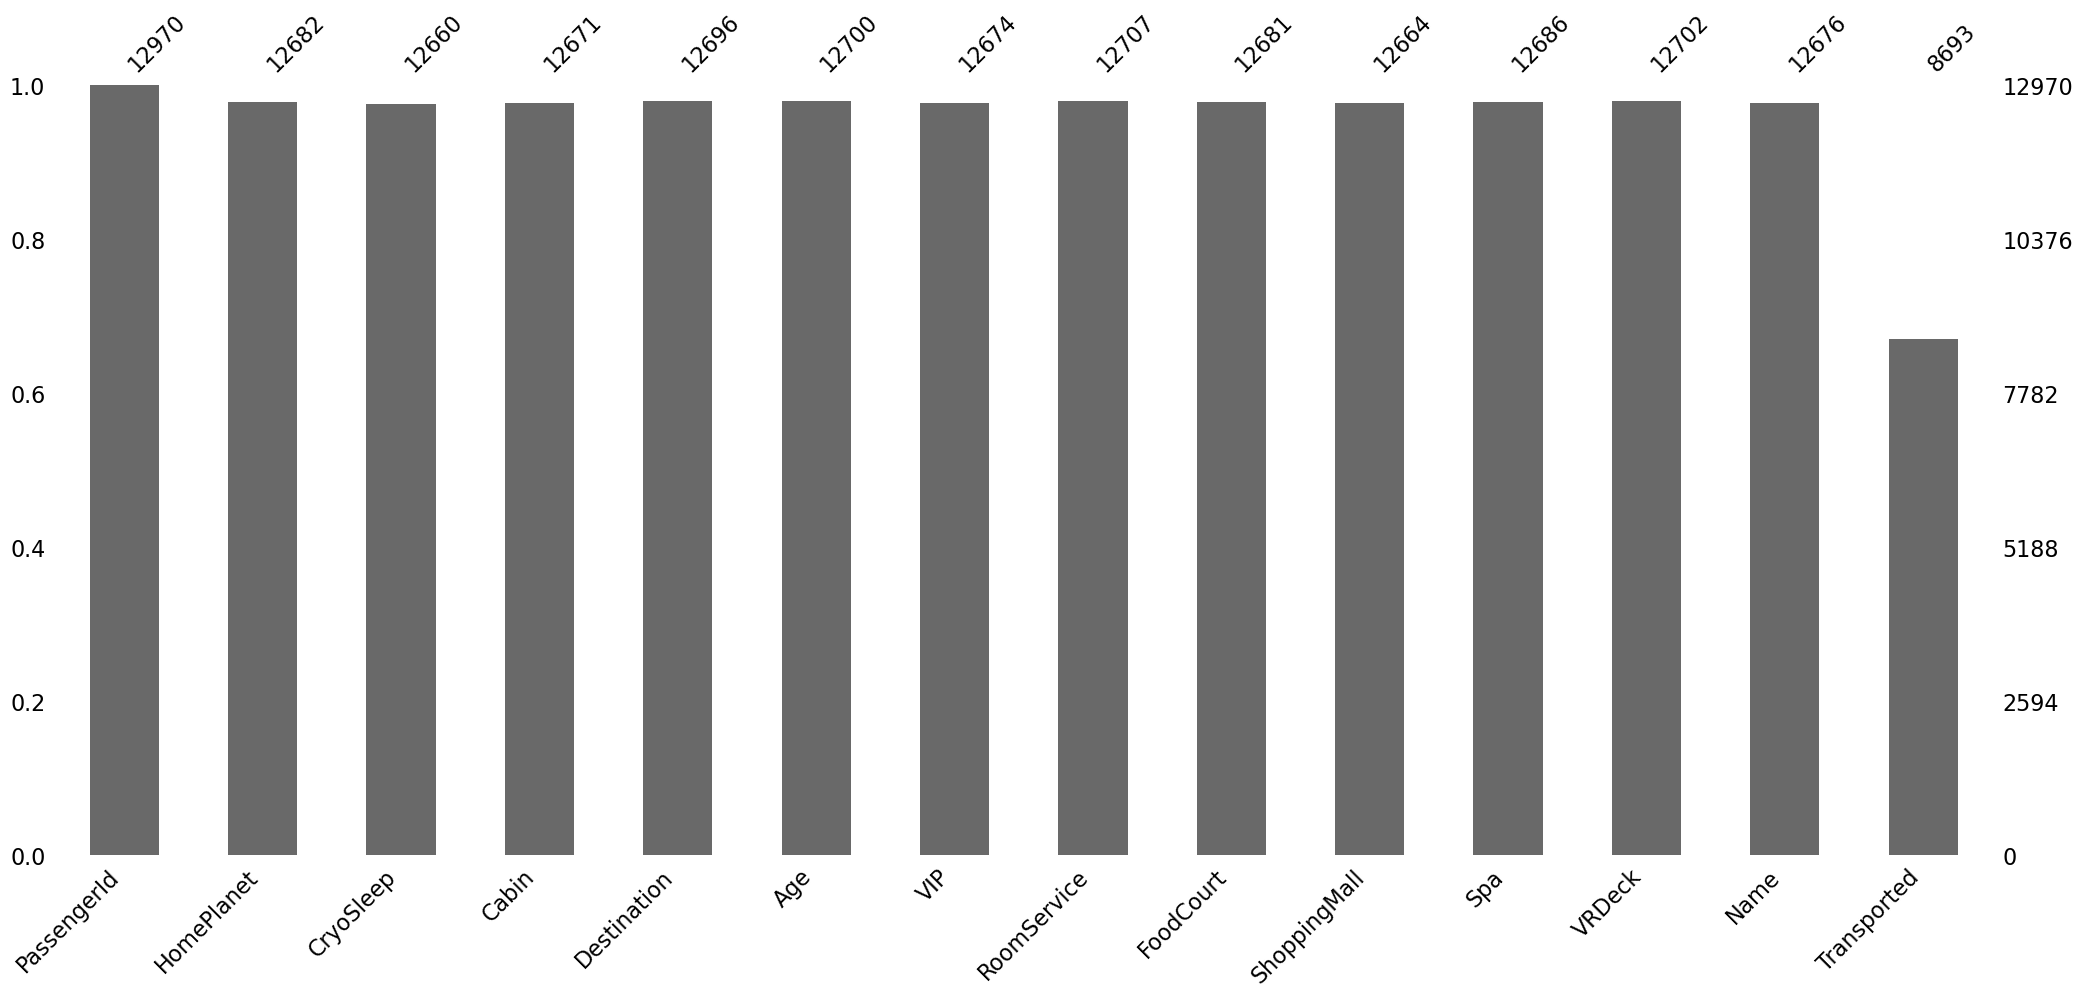

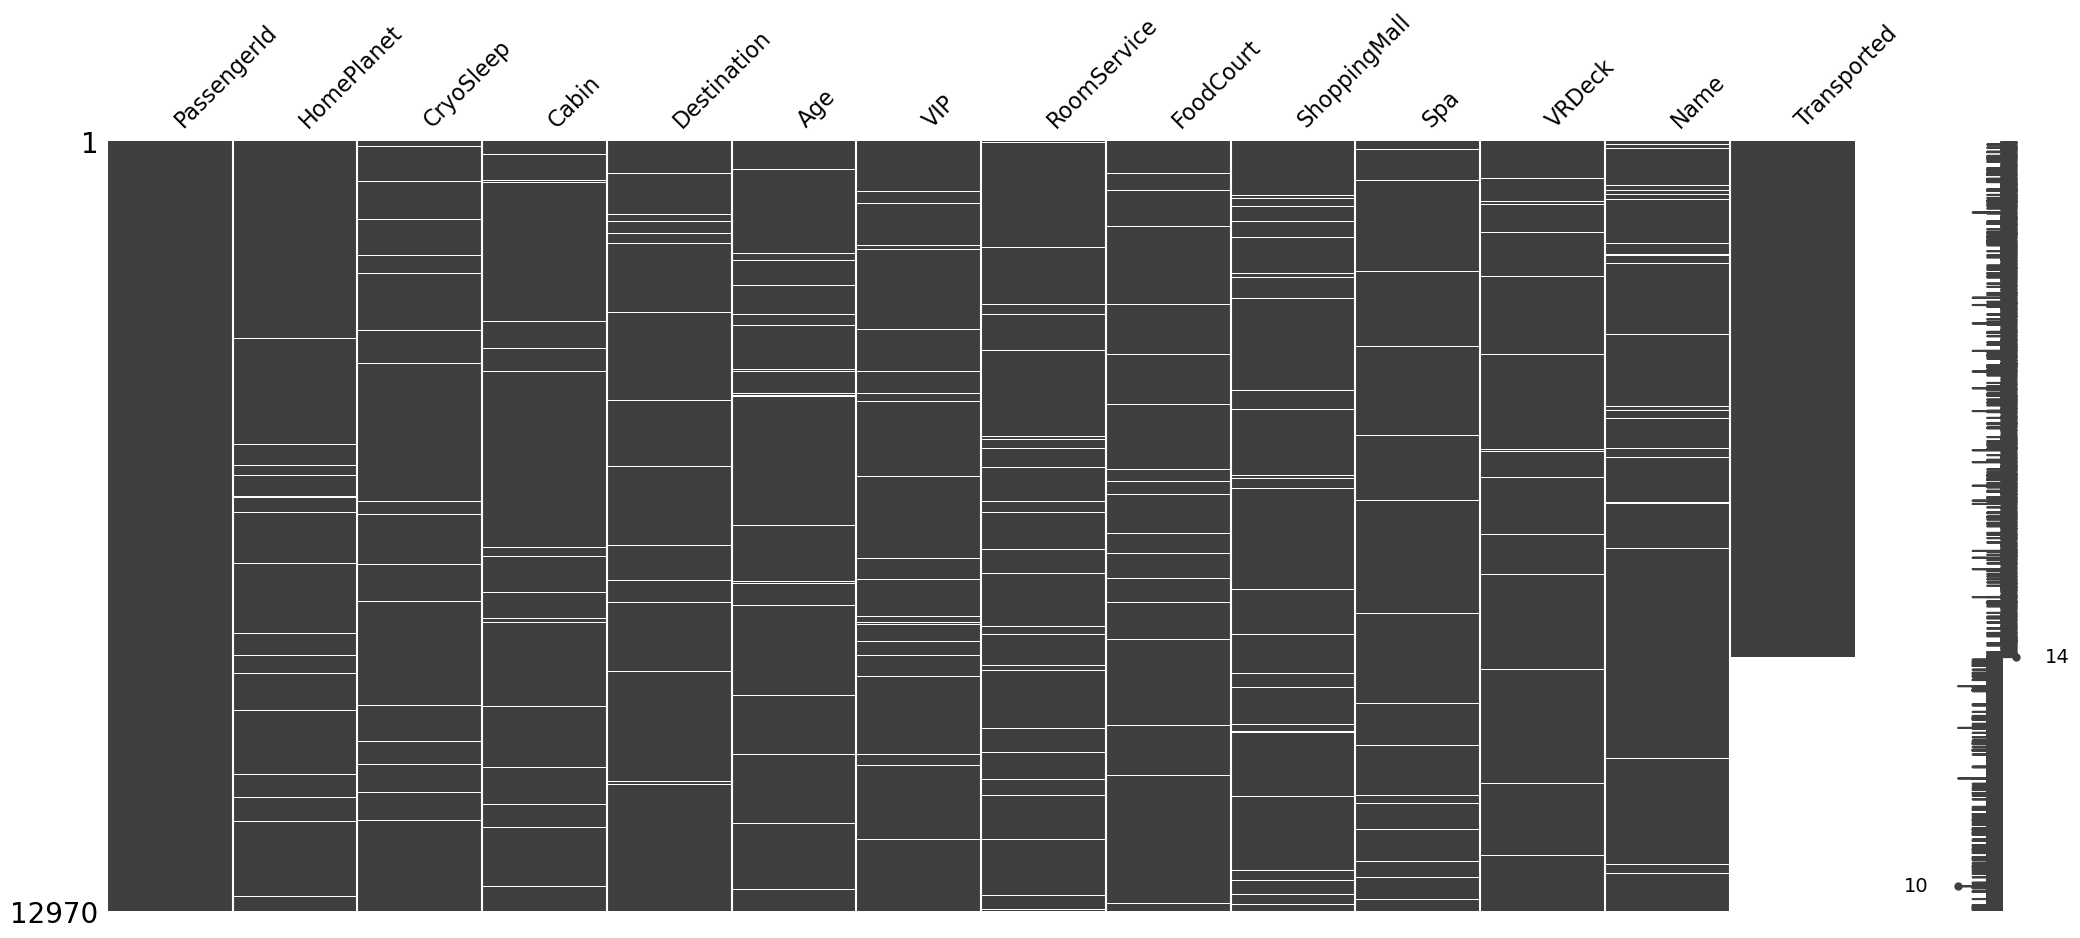

In [5]:
test['Transported'] = np.nan
df = pd.concat([train, test], ignore_index=True)
display(df.sample(5))
msno.bar(df), msno.matrix(df);

### <center>Заполнение пропусков

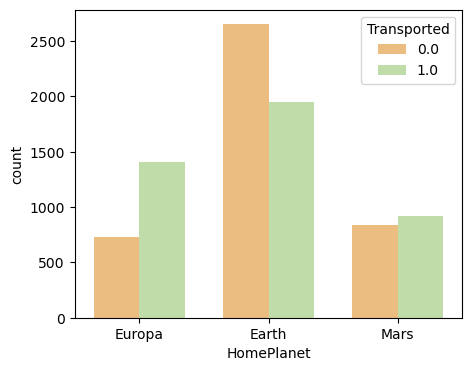

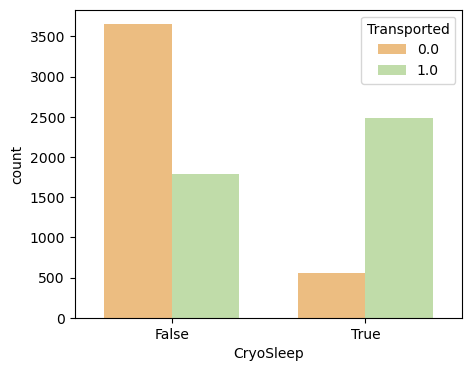

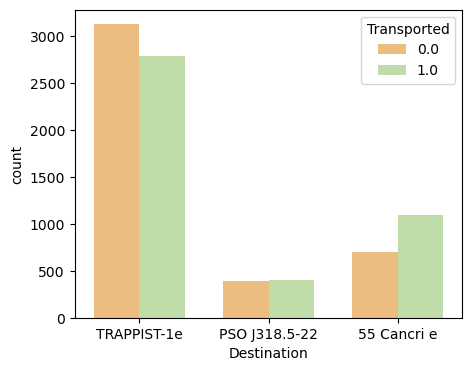

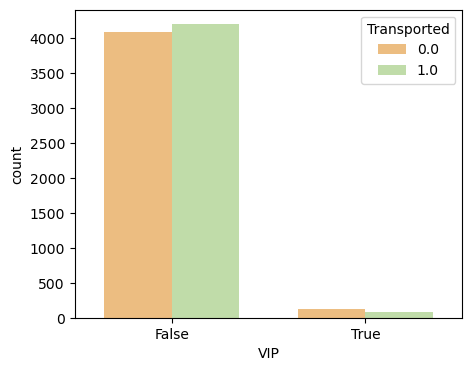

In [6]:
for column in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=column, data=df, hue='Transported', palette="Spectral", width=0.7);
    plt.show();

In [7]:
print(f"Earth: {len(df[(df['Transported'] == True) & (df['HomePlanet'] == 'Earth')]) / len(df[df['HomePlanet'] == 'Earth'])}")
print(f"Europa: {len(df[(df['Transported'] == True) & (df['HomePlanet'] == 'Europa')]) / len(df[df['HomePlanet'] == 'Europa'])}")
print(f"Mars: {len(df[(df['Transported'] == True) & (df['HomePlanet'] == 'Mars')]) / len(df[df['HomePlanet'] == 'Mars'])}")

Earth: 0.28419519300801166
Europa: 0.44813278008298757
Mars: 0.34277198211624443


In [8]:
display(df['HomePlanet'].value_counts(dropna=False))
display(df['CryoSleep'].value_counts(dropna=False))
display(df['Cabin'].value_counts(dropna=False)) #
display(df['Destination'].value_counts(dropna=False))
display(df['Age'].value_counts(dropna=False)) ##
display(df['VIP'].value_counts(dropna=False))
display(df['RoomService'].value_counts(dropna=False)) ##
display(df['FoodCourt'].value_counts(dropna=False)) ##
display(df['ShoppingMall'].value_counts(dropna=False)) ##
display(df['Spa'].value_counts(dropna=False)) ##
display(df['VRDeck'].value_counts(dropna=False)) ##

HomePlanet
Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: count, dtype: int64

CryoSleep
False    8079
True     4581
NaN       310
Name: count, dtype: int64

Cabin
NaN         299
G/734/S       8
G/160/P       8
F/1194/P      7
G/109/P       7
           ... 
E/317/P       1
F/1039/P      1
F/1038/P      1
C/158/P       1
G/1498/S      1
Name: count, Length: 9826, dtype: int64

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
NaN               274
Name: count, dtype: int64

Age
18.0    496
24.0    482
21.0    468
19.0    455
22.0    454
       ... 
75.0      6
79.0      5
78.0      4
77.0      3
76.0      2
Name: count, Length: 81, dtype: int64

VIP
False    12401
NaN        296
True       273
Name: count, dtype: int64

RoomService
0.0       8303
NaN        263
1.0        185
2.0        113
3.0         89
          ... 
1240.0       1
2189.0       1
630.0        1
398.0        1
652.0        1
Name: count, Length: 1579, dtype: int64

FoodCourt
0.0        8146
NaN         289
1.0         175
2.0         105
4.0          75
           ... 
2853.0        1
9495.0        1
342.0         1
11552.0       1
601.0         1
Name: count, Length: 1954, dtype: int64

ShoppingMall
0.0       8331
NaN        306
1.0        225
2.0        112
3.0         94
          ... 
751.0        1
1573.0       1
1541.0       1
1661.0       1
3851.0       1
Name: count, Length: 1368, dtype: int64

Spa
0.0       7935
NaN        284
1.0        218
2.0        148
3.0         82
          ... 
971.0        1
2290.0       1
1450.0       1
4517.0       1
1812.0       1
Name: count, Length: 1680, dtype: int64

VRDeck
0.0        8252
NaN         268
1.0         211
2.0         108
3.0          89
           ... 
10074.0       1
3491.0        1
1469.0        1
5558.0        1
494.0         1
Name: count, Length: 1643, dtype: int64

In [9]:
def fill_missings_with_probabilities(df, missing_column, condition_column):
    conditions = df[condition_column].dropna().unique()

    probabilities = {}
    for condition in conditions:
        condition_data = df[df[condition_column] == condition]
        total_count = len(condition_data[missing_column].dropna())

        if total_count > 0:
            probabilities[condition] = {
                value: len(condition_data[condition_data[missing_column] == value]) / total_count
                for value in df[missing_column].dropna().unique()
            }
        else:
            probabilities[condition] = {}

    overall_probabilities = df[condition_column].value_counts(normalize=True).to_dict()

    def fill_row(row):
        if pd.isna(row[missing_column]):
            if pd.notna(row[condition_column]):
                condition = row[condition_column]
                if condition in probabilities and probabilities[condition]:
                    return np.random.choice(
                        list(probabilities[condition].keys()),
                        p=list(probabilities[condition].values())
                    )
            else:
                condition_choice = np.random.choice(
                    list(overall_probabilities.keys()),
                    p=list(overall_probabilities.values())
                )
                if condition_choice in probabilities and probabilities[condition_choice]:
                    return np.random.choice(
                        list(probabilities[condition_choice].keys()),
                        p=list(probabilities[condition_choice].values())
                    )
        return row[missing_column]

    df[missing_column] = df.apply(fill_row, axis=1)
    return df

In [10]:
df = fill_missings_with_probabilities(df, missing_column='HomePlanet', condition_column='Transported')
df = fill_missings_with_probabilities(df, missing_column='CryoSleep', condition_column='Transported')
df = fill_missings_with_probabilities(df, missing_column='Destination', condition_column='Transported')
df = fill_missings_with_probabilities(df, missing_column='VIP', condition_column='Transported')

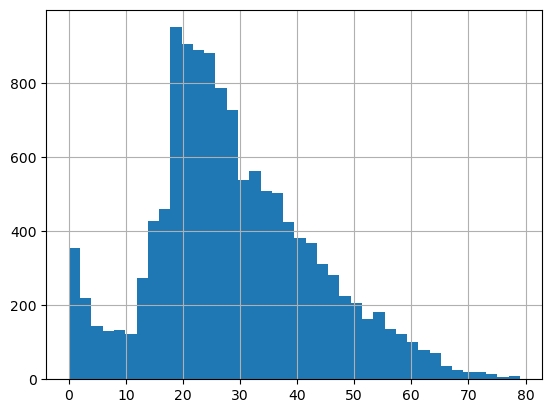

In [11]:
df['Age'].hist(bins=40);

#### Видно, что возраст здесь не имеет нормального распределения

In [12]:
print(df['Age'].mode()[0])
print(df['Age'].median())
print(df['Age'].mean())

18.0
27.0
28.771968503937007


In [13]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].median()

In [14]:
def convert_to_numeric_gender(gender):
    if gender == 'male':
        return 0
    elif gender == 'female':
        return 1
    else:
        return 0.5


def get_gender_from_detector(name):
    if name and isinstance(name, str):
        first_name = name.split()[0]
        return d.get_gender(first_name)
    return 'unknown'


tqdm.pandas()
d = gender.Detector()
df['Sex'] = df['Name'].progress_apply(lambda name: convert_to_numeric_gender(get_gender_from_detector(name)))

100%|████████████████████████████████████████████████████████████████████████| 12970/12970 [00:00<00:00, 498735.95it/s]


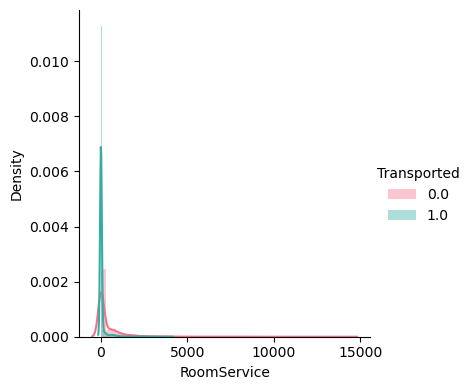

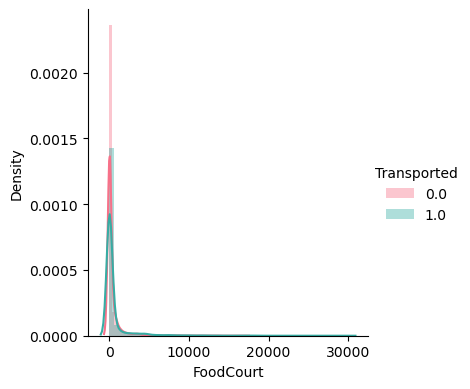

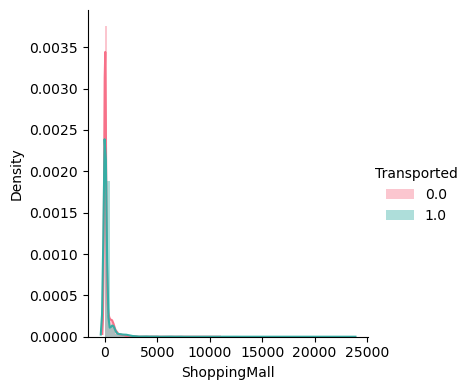

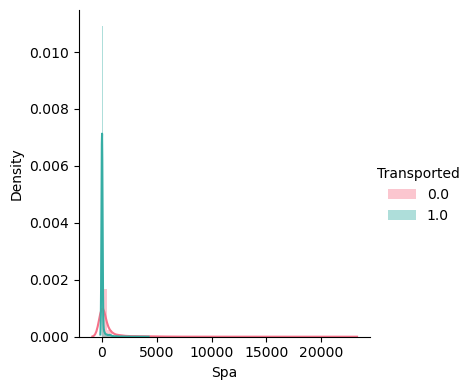

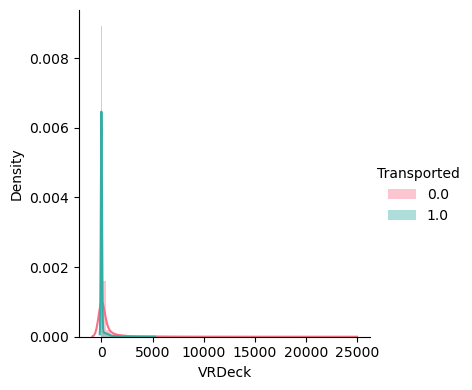

In [15]:
for column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    sns.FacetGrid(df, hue='Transported', height=4, palette='husl').map(sns.distplot, column).add_legend();
    plt.show();

In [16]:
for column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [17]:
pd.set_option("display.max_rows", None)


df['Cabin'].value_counts().sort_index(ascending=True)

Cabin
A/0/P       2
A/0/S       2
A/1/P       1
A/1/S       3
A/10/P      1
A/10/S      1
A/100/S     2
A/101/S     2
A/102/S     1
A/103/S     3
A/104/S     3
A/105/S     2
A/106/S     1
A/107/S     1
A/108/S     1
A/109/S     1
A/11/P      2
A/11/S      1
A/12/P      3
A/12/S      1
A/13/P      2
A/13/S      1
A/14/P      2
A/14/S      3
A/15/P      1
A/15/S      3
A/16/P      2
A/16/S      2
A/17/P      2
A/17/S      1
A/18/P      1
A/18/S      1
A/19/P      3
A/19/S      1
A/2/P       1
A/2/S       1
A/20/P      1
A/20/S      4
A/21/P      2
A/21/S      1
A/22/P      4
A/22/S      1
A/23/P      2
A/23/S      3
A/24/P      1
A/24/S      1
A/25/P      1
A/25/S      1
A/26/P      1
A/26/S      2
A/27/P      3
A/27/S      4
A/28/P      1
A/28/S      1
A/29/P      1
A/29/S      2
A/3/P       1
A/3/S       1
A/30/P      1
A/30/S      2
A/31/P      1
A/31/S      2
A/32/P      2
A/32/S      1
A/33/P      1
A/33/S      1
A/34/P      1
A/34/S      3
A/35/P      1
A/35/S      1
A/36/P      2


In [18]:
# ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X']
# ['P', 'S']
pd.reset_option("display.max_rows")
nan_counter = 0


def split_Сabin(cabin_value):
    if pd.isna(cabin_value):  # Проверяем, если значение NaN
        return assign_nan_values()
    else:
        return cabin_value.split('/')


def assign_nan_values():
    global nan_counter
    result = ['X', nan_counter // 2, 'P' if nan_counter % 2 == 0 else 'S']
    nan_counter += 1
    return result


df[['Deck', 'Num', 'Side']] = df['Cabin'].apply(lambda x: pd.Series(split_Сabin(x)))
df['Num'] = df['Num'].astype(int)

In [19]:
df[['Num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df[['Num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].astype(int)
df['TotalCosts'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [20]:
df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
df['GroupSize'] = df['Group'].progress_apply(lambda x: df['Group'].value_counts()[x])

100%|██████████████████████████████████████████████████████████████████████████| 12970/12970 [00:07<00:00, 1672.79it/s]


In [21]:
df['Name'] = df['Name'].fillna('Unknown Unknown')
df['Surname'] = df['Name'].str.split().str[-1]
df['RelativesNum'] = df['Surname'].progress_apply(lambda x: -1 if x == 'Unknown' else df['Surname'].value_counts()[x])
df['RelativesNum'] = df['RelativesNum'].replace(-1, df['RelativesNum'].mode()[0] if df['RelativesNum'].mode()[0] != -1 else 1)

100%|███████████████████████████████████████████████████████████████████████████| 12970/12970 [00:29<00:00, 441.20it/s]


In [22]:
df['IsHighSpender'] = df['TotalCosts'] >= df['TotalCosts'].sum() / df.shape[0]
df['IsHighSpender'].value_counts()

IsHighSpender
False    9704
True     3266
Name: count, dtype: int64

In [23]:
bins = [0, 12, 17, 29, float('inf')]
labels = ['Children', 'Teenagers', 'Young_Adults', 'Adults']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['AgeGroup'].value_counts()

AgeGroup
Young_Adults    5411
Adults          5295
Teenagers       1107
Children         897
Name: count, dtype: int64

In [24]:
df.drop(columns=['PassengerId', 'Cabin', 'Surname', 'Name'], inplace=True)

In [25]:
df.dtypes

HomePlanet         object
CryoSleep            bool
Destination        object
Age                 int32
VIP                  bool
RoomService         int32
FoodCourt           int32
ShoppingMall        int32
Spa                 int32
VRDeck              int32
Transported        object
Sex               float64
Deck               object
Num                 int32
Side               object
TotalCosts          int64
Group               int32
GroupSize           int64
RelativesNum        int64
IsHighSpender        bool
AgeGroup         category
dtype: object

In [26]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = list(set(df.columns) - set(categorical_features))

In [27]:
categorical_features = list(set(categorical_features) - {'Transported'})
categorical_features

['HomePlanet', 'AgeGroup', 'Deck', 'Side', 'Destination']

In [28]:
numerical_features

['GroupSize',
 'CryoSleep',
 'TotalCosts',
 'RelativesNum',
 'Group',
 'ShoppingMall',
 'Num',
 'Sex',
 'FoodCourt',
 'IsHighSpender',
 'Age',
 'VIP',
 'Spa',
 'VRDeck',
 'RoomService']

In [29]:
# std_scaler = StandardScaler()
# mm_scaler = MinMaxScaler()
r_scaler = RobustScaler()

df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_processed[numerical_features] = r_scaler.fit_transform(df_processed[numerical_features])

In [30]:
x_train = df_processed[df.Transported.notna()].drop(columns=['Transported'])
y_train = df_processed[df.Transported.notna()][['Transported']].astype(int)
print(x_train.shape)

x_test = df_processed[df.Transported.isna()].drop(columns=['Transported']).reset_index(drop=True)
y_test = sample_submission[['Transported']]
print(x_test.shape)

train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

train.to_excel("data/train_prepared.xlsx")
test.to_excel("data/test_prepared.xlsx")

(8693, 31)
(4277, 31)


In [32]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

rf_clf_pred = rf_clf.predict(x_test)

print(f"Accuracy for Random Forest Regressor: {accuracy_score(y_test, rf_clf_pred)}")

Accuracy for Random Forest Regressor: 0.530745849894786


In [33]:
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(x_train, y_train)

xgb_clf_pred = xgb_clf.predict(x_test)

print(f"Accuracy for XGBoost Classifier: {accuracy_score(y_test, xgb_clf_pred)}")

Accuracy for XGBoost Classifier: 0.5066635492167407
